# Feature Detection

In [3]:
##Drive
from google.colab import drive
drive.mount('/content/drive')

!pwd
!ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content
drive  sample_data


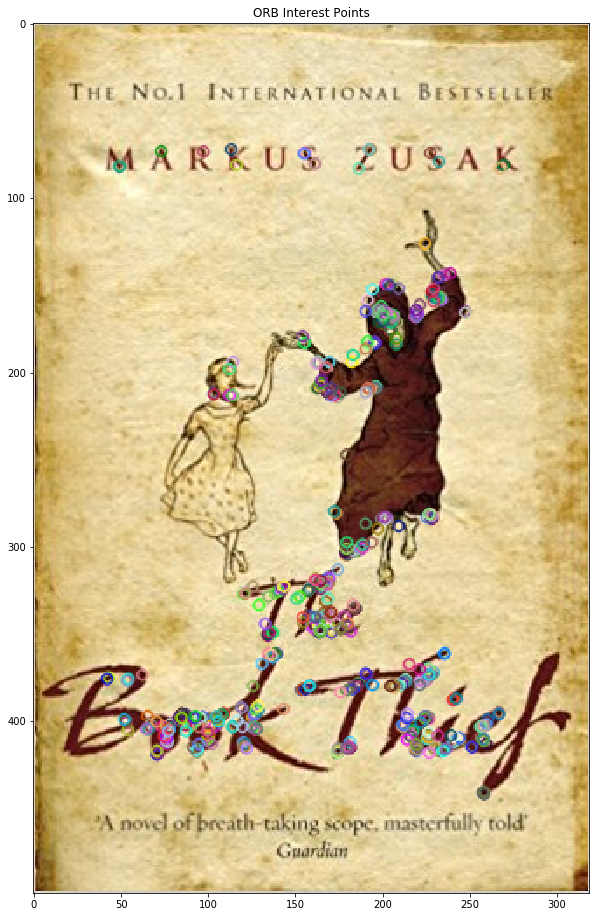

In [7]:
## ON DRIVE

import os, sys 
from google.colab.patches import cv2_imshow

import numpy as np
import cv2 # OpenCV-Python
%matplotlib inline
import matplotlib.pyplot as plt

os.chdir("/content/drive/My Drive/DOCENCIA_Universidad_CLASSROOM/[ICAI] Master en Big Data - Unstructured Data Analysis/IMAGE") 
sys.path.append("/content/drive/My Drive/DOCENCIA_Universidad_CLASSROOM/[ICAI] Master en Big Data - Unstructured Data Analysis/IMAGE") 
    
# Root directory of the project 
ROOT_DIR = os.path.abspath(".") 
# Directory of images to run detection on 
IMAGE_DIR = os.path.join(ROOT_DIR, "images") 

img_building = cv2.imread(os.path.join(IMAGE_DIR, "the_book_thief.jpg"))

## ON LOCAL (YOUR DESKTOP)

#img_building = cv2.imread( 'the_book_thief.jpg')
img_building = cv2.cvtColor(img_building, cv2.COLOR_BGR2RGB)  # Convert from cv's BRG default color order to RGB

orb = cv2.ORB_create()  # OpenCV 3 backward incompatibility: Do not create a detector with `cv2.ORB()`.
key_points, description = orb.detectAndCompute(img_building, None)
img_building_keypoints = cv2.drawKeypoints(img_building, 
                                           key_points, 
                                           img_building, 
                                           flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) # Draw circles.

#YOUR TURN: Draw different keypoints: https://docs.opencv.org/master/d4/d5d/group__features2d__draw.html

plt.figure(figsize=(16, 16))
plt.title('ORB Interest Points')
plt.imshow(img_building_keypoints); plt.show()

# Feature Matching

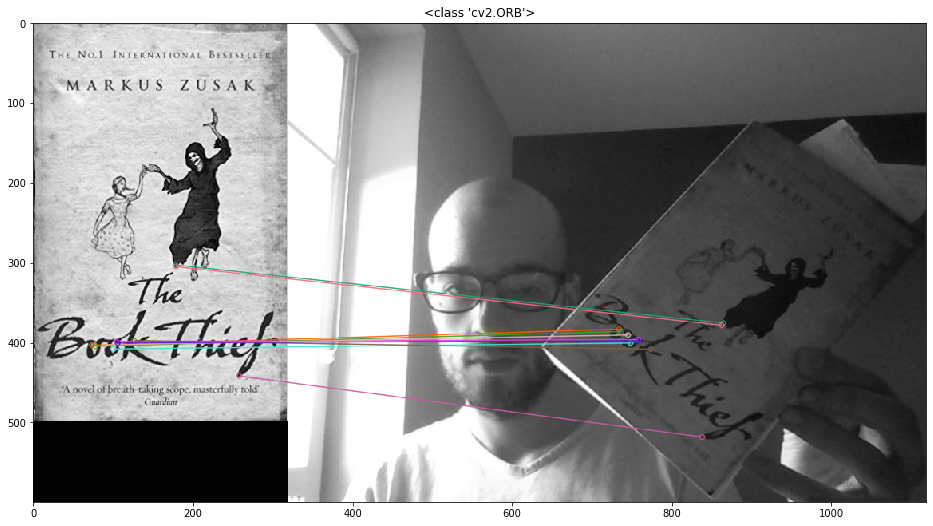

In [0]:
def image_detect_and_compute(detector, img_name):
    """Detect and compute interest points and their descriptors."""
    img = cv2.imread( img_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    kp, des = detector.detectAndCompute(img, None)
    return img, kp, des
    

def draw_image_matches(detector, img1_name, img2_name, nmatches=10):
    """Draw ORB feature matches of the given two images."""
    img1, kp1, des1 = image_detect_and_compute(detector, img1_name)
    img2, kp2, des2 = image_detect_and_compute(detector, img2_name)
    
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key = lambda x: x.distance) # Sort matches by distance.  Best come first.
    
    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:nmatches], img2, flags=2) # Show top 10 matches
    plt.figure(figsize=(16, 16))
    plt.title(type(detector))
    plt.imshow(img_matches); plt.show()
    

orb = cv2.ORB_create()
draw_image_matches(orb, 'the_book_thief.jpg', 'me_holding_book.jpg')

### **YOUR TURN**: Try different Detectors (SIFT, ORB, BRIEF, FAST...) and Matchers (and distances) with your images.

Detection: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_table_of_contents_feature2d/py_table_of_contents_feature2d.html

Matching: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_matcher/py_matcher.html#exercises

